## Análise de Dados com episódios do anime One Piece

![](luffy.jpg)

### 1. Introdução

A motivação desta análise foi entender e explorar padrões e/ou características relacionadas à quantidade de votos e à avaliação média dos telespectadores para os diferentes tipos de episódios e arcos do famoso anime **One Piece**.

As análises foram inteiramente feitas em **Jupyter Notebooks** com **Python 3.12.4**, utilizando as bibliotecas **Pandas** (Importação e manipulação dos dados), **Plotly** (Construção dos gráficos) e **Scipy** (Testes estatísticos).

### 2. Descrição dos Dados

- ***Episódio***: Número do episódio.
- ***Arco***: O arco em questão que o episódio foi lançado. Arcos são partes de uma história maior, com diferentes objetivos e contextos. Nos animes, existem diversos arcos pertencentes à sagas, que são semelhantes às temporadas de séries.
- ***Tipo***: O tipo do episódio em questão. Pode ser: 
    1) Canônico: O conteúdo do episódio é 100% importante para a narrativa do anime.
    2) Filler: O conteúdo do episódio não é importante para a narrativa principal, ou seja, é um episódio com uma história paralela à história principal.
    3) Semi-Filler: Parte do episódio é importante para a narrativa do anime mas algumas partes são caracterizadas como Filler.

- ***Título***: Titulo do episódio, em japonês.
- ***Votos***: Quantidade de votos realizadas pelos telespectadores no site da IMDb.
- ***Avaliação***: Avaliação média dos votos realizados pelos telespectadores no site da IMDb.


Os dados referentes ao **Episódio**, **Título**, **Votos** e **Avaliação** de cada episódio foram extraídos com WebScrapping, utilizando BeautifulSoup e Selenium, do site [IMDb](https://www.imdb.com/title/tt0388629/episodes/?ref_=tt_eps_sm). Após o WebScrapping, complementei os dados pelo próprio Excel com o *Tipo* e *Arco* pertencente a cada episódio, com base no site da [IGN](https://br.ign.com/one-piece-2/95364/feature/one-piece-guia-de-sagas-arcos-e-episodios-fillers).

### 3. Perguntas a serem respondidas com as análises:

- **Com base nos diferentes tipos**:

    - Quantos episódios tem de cada tipo? 

    - Quais são as estatísticas relacionadas às avaliações e quantidade de votos para cada tipo de episódio? 

    - Há uma correlação entre a avaliação e a quantidade de votos de cada tipo de episódio? 

    - A quantidade de votos e avaliações dos episódios relevantes para a narrativa principal lançados está melhorando ou piorando atualmente?

    - O lançamento de episódios Filler está aumentando ou diminuindo atualmente?

- **Com base nos diferentes arcos**:
    
    - Quantos arcos existem no anime? Qual a quantidade de episódios em cada um e quais são os maiores? 

    - Qual o tipo ou quais os tipos de episódio presentes em cada arco? 

    - Quais são os arcos mais votados e os melhor avaliados? 

    - Há uma correlação entre a quantidade total de votos e avaliação média ou mediana de cada arco? 
    
    - O tamanho do arco tem correlação com a sua quantidade total de votos e a avaliação média ou mediana?    

#### Bibliotecas utilizadas

In [36]:
# Para importação e manipulação de dados
import pandas as pd

# Para construção de gráficos
import plotly.subplots as sp
import plotly.graph_objects as go

# Para testes estatísticos
from scipy.stats import shapiro

# Para não aparecer mensagens de aviso
import warnings
warnings.filterwarnings(action='ignore')

#### Leitura do Dataset principal

In [37]:
df = pd.read_excel('.../OnePieceProject/episodes_final.xlsx')
df

,Episódio,Arco,Tipo,Título,Lançamento,Votos,Avaliação
0,1,Romance Dawn,Canônico,Ore wa Luffy! Kaizoku Ou ni Naru Otoko Da!,1999-10-20,28293,8.4
1,2,Romance Dawn,Canônico,Daikengo Arawaru! Kaizokugari Roronoa Zoro,1999-11-17,13351,8.3
2,3,Romance Dawn,Canônico,Morgan vs. Luffy! Nazo no Bishoujo wa Dare?,1999-11-24,5868,8.0
3,4,Orange Town,Canônico,Luffy no Kako! Akagami no Shanks Toujou,1999-12-08,4744,8.3
4,5,Orange Town,Canônico,Kyoufu Nazo no Chikara! Kaizoku Douke Buggy-se...,1999-12-15,3120,7.4
...,...,...,...,...,...,...,...
1112,1113,Egghead,Canônico,"Run, Koby! A Desperate Escape Strategy!",2024-07-28,1873,8.3
1113,1114,Egghead,Canônico,For the Beloved Pupil - The Fist of Vice Admir...,2024-08-04,7681,9.7
1114,1115,Egghead,Canônico,The Navy Surprised! The Navy Headquarters' For...,2024-08-11,3891,9.7
1115,1116,Egghead,Canônico,Let's Go Get It! Buggy's Big Declaration,2024-08-18,1196,8.3


#### Informações sobre o Dataset

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Episódio    1117 non-null   int64         
 1   Arco        1117 non-null   object        
 2   Tipo        1117 non-null   object        
 3   Título      1117 non-null   object        
 4   Lançamento  1117 non-null   datetime64[ns]
 5   Votos       1117 non-null   int64         
 6   Avaliação   1117 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 61.2+ KB


- O conjunto de dados apresenta 1117 linhas (episódios) e 5 colunas. Nenhuma coluna possui dados nulos.

### Sobre os Tipos

#### Quantos episódios tem de cada tipo? 

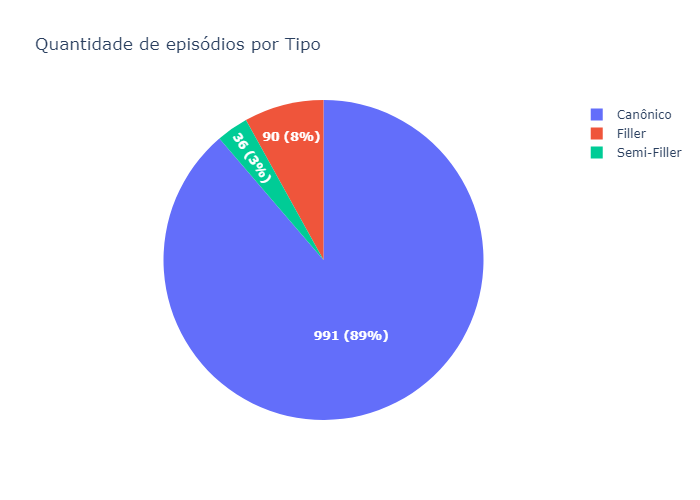

In [39]:
# Quantidade de episódios agrupados por tipo
eps_por_tipo = df['Tipo'].value_counts()

# Plot principal
fig = go.Figure(go.Pie(labels=eps_por_tipo.index, values=eps_por_tipo.values, textinfo='value+percent',
                     texttemplate='%{value:.0f} (%{percent:.0%})', textfont=dict(color='white', weight='bold')))

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=500, width=700, title = 'Quantidade de episódios por Tipo')
fig.show('png')

- Dos 1117 episódios, 991 (89%) são canônicos, 90 (8%) são fillers e 36 (3%) são semi-fillers.
- Isso mostra que, no geral, uma esmagadora porcentagem dos episódios apresenta conteúdo relevante para a narrativa principal do anime.

#### Quais são as estatísticas relacionadas às avaliações e quantidade de votos para cada tipo de episódio? 

#### Boxplots

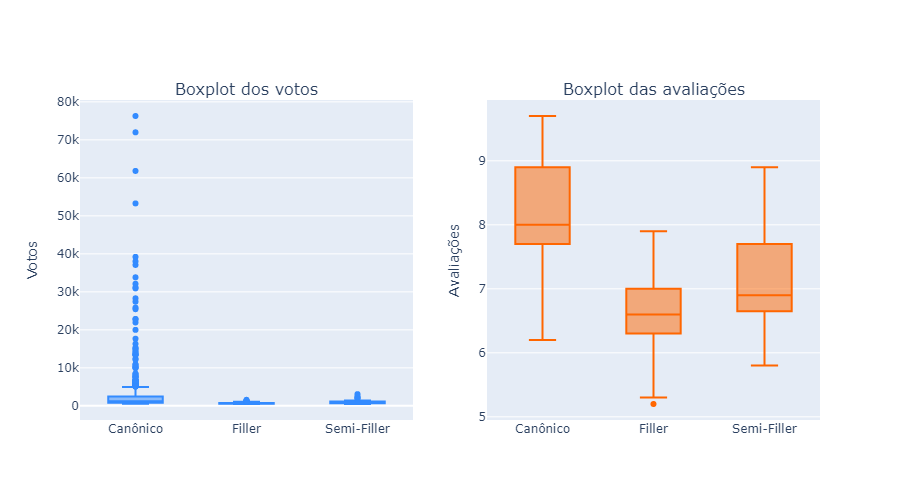

In [40]:
# Criando os subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Boxplot dos votos', 'Boxplot das avaliações'])

# Primeiro subplot
fig.add_trace(go.Box(x=df['Tipo'], y=df['Votos'], marker_color='#338bff', boxpoints='outliers'), row=1, col=1)
fig.update_yaxes(title_text="Votos", row=1, col=1)

# Segundo subplot
fig.add_trace(go.Box(x=df['Tipo'], y=df['Avaliação'], marker_color='#FF6600', boxpoints='outliers'), row=1, col=2)
fig.update_yaxes(title_text="Avaliações", row=1, col=2)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=500, width=900, showlegend=False)
fig.show('png')

- A partir dos boxplots das votações para cada tipo, nota-se que os episódios canônicos apresentam taxas mais altas que episódios fillers e semi-fillers, com uma variação maior. Além disso, nota-se uma grande quantidade de outliers, principalmente nos episódios canônicos, que se destacaram por conta da quantidade de telespectadores que votaram esporadicamente.
- Pelas avaliações, nota-se que os episódios canônicos também possuem valores acima, em comparação aos fillers e semi-fillers, com fillers ainda possuindo as menores taxas de todas, incluindo um outlier inferior.
- Observa-se que, por conta dos outliers, será importante considerar a mediana ao invés da média para as próximas análises. Isso evita obter métricas enviesadas devido à valores muito altos ou baixos.

#### Medianas

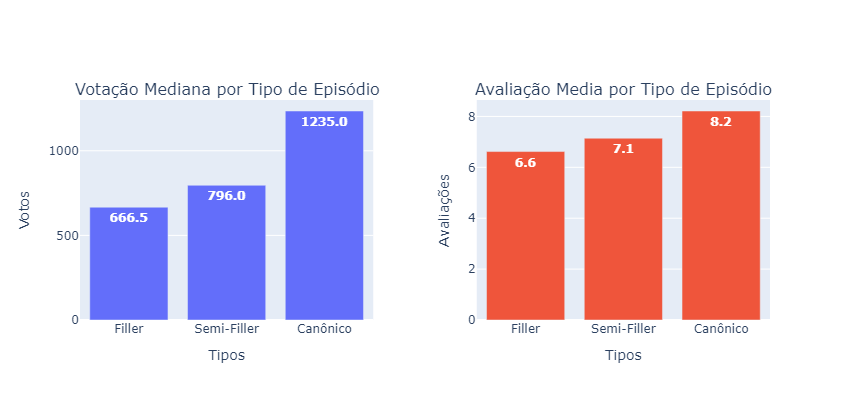

In [62]:
# Votação média agrupada por tipo de episódio, ordenado do menor para o maior
tipo_mean_votos = df.groupby('Tipo')['Votos'].median().sort_values()

# Avaliação média agrupada por tipo de episódio, ordenado do menor para o maior
tipo_mean_avaliacao = df.groupby('Tipo')['Avaliação'].mean().sort_values()

fig = sp.make_subplots(rows=1, cols=2, horizontal_spacing=0.15, subplot_titles=['Votação Mediana por Tipo de Episódio', 
                                                                                'Avaliação Média por Tipo de Episódio'])

# Primeiro subplot
fig.add_trace(go.Bar(x=tipo_mean_votos.index, y=tipo_mean_votos.values, texttemplate="%{y:.1f}", 
                     textfont=dict(color='white', weight='bold')), row=1, col=1)
fig.update_xaxes(title_text="Tipos", row=1, col=1)
fig.update_yaxes(title_text="Votos", row=1, col=1)

# Segundo subplot
fig.add_trace(go.Bar(x=tipo_mean_avaliacao.index, y=tipo_mean_avaliacao.values, texttemplate="%{y:.1f}", textfont=dict(color='white', weight='bold')), row=1, col=2)
fig.update_xaxes(title_text="Tipos", row=1, col=2)
fig.update_yaxes(title_text="Avaliações", row=1, col=2)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=400, width=850, showlegend=False)
fig.show('png')

- Episódios canônicos apresentam votação mediana de 1235 votos, enquanto que semi-fillers possuem 796 votos e fillers, 666.5 votos.
- Na avaliação média, episódios canônicos possuem avaliação 8, enquanto que semi-fillers possuem 6.9 e fillers, 6.6. 
- Isso mostra que fillers e semi-fillers estão próximos, enquanto que episódios canônicos se destacam. Isso é esperado, pois episódios canônicos são compostos inteiramente pela narrativa principal e atraem mais os fãs.

#### Valores máximos

In [42]:
# Valores máximos de votos agrupados por tipo
max_votos_por_tipo = df.groupby('Tipo')['Votos'].max().reset_index()

df[(df['Tipo'] == max_votos_por_tipo.iloc[0,0]) & (df['Votos'] == max_votos_por_tipo.iloc[0,1]) | 
   (df['Tipo'] == max_votos_por_tipo.iloc[1,0]) & (df['Votos'] == max_votos_por_tipo.iloc[1,1]) | 
   (df['Tipo'] == max_votos_por_tipo.iloc[2,0]) & (df['Votos'] == max_votos_por_tipo.iloc[2,1])].sort_values('Votos', ascending=False).reset_index(drop=True)

,Episódio,Arco,Tipo,Título,Lançamento,Votos,Avaliação
0,1062,País de Wano,Canônico,The Three-Sword Style of the Supreme King! Zor...,2023-05-21,76272,9.7
1,988,País de Wano,Semi-Filler,Arrival of Reinforcements! Captain of the Whit...,2021-08-22,3083,8.9
2,50,Loguetown,Filler,Usopp Tai Kozure no Daddy: Mahiru no Kettou,2000-11-29,1589,7.4


In [43]:
# Valores máximos de avaliações agrupados por tipo
max_avaliação_por_tipo = df.groupby('Tipo')['Avaliação'].max().reset_index()

df[(df['Tipo'] == max_avaliação_por_tipo.iloc[0,0]) & (df['Avaliação'] == max_avaliação_por_tipo.iloc[0,1]) | 
   (df['Tipo'] == max_avaliação_por_tipo.iloc[1,0]) & (df['Avaliação'] == max_avaliação_por_tipo.iloc[1,1]) | 
   (df['Tipo'] == max_avaliação_por_tipo.iloc[2,0]) & (df['Avaliação'] == max_avaliação_por_tipo.iloc[2,1])].sort_values('Avaliação', ascending=False).reset_index(drop=True)

,Episódio,Arco,Tipo,Título,Lançamento,Votos,Avaliação
0,377,Thriller Bark,Canônico,Nakama no Itami wa Waga Itami: Zoro Kesshi no ...,2008-11-16,39203,9.7
1,405,Arquipélago Sabaody,Canônico,Kesareta Nakama-tachi: Mugiwara Ichimi Saigo n...,2009-06-14,33820,9.7
2,1114,Egghead,Canônico,For the Beloved Pupil - The Fist of Vice Admir...,2024-08-04,7681,9.7
3,1112,Egghead,Canônico,Clash! Shanks vs. Eustass Kid,2024-07-14,15339,9.7
4,1100,Egghead,Canônico,Powers on a Different Level! Luffy vs. Lucci!,2024-04-07,21931,9.7
5,1089,Egghead,Canônico,Entering a New Chapter! Luffy and Sabo's Paths!,2024-01-07,22869,9.7
6,1062,País de Wano,Canônico,The Three-Sword Style of the Supreme King! Zor...,2023-05-21,76272,9.7
7,1015,País de Wano,Canônico,Straw Hat Luffy! The Man Who Will Become the K...,2022-04-24,61811,9.7
8,1115,Egghead,Canônico,The Navy Surprised! The Navy Headquarters' For...,2024-08-11,3891,9.7
9,808,Whole Cake,Canônico,Kanashiki Kettou: Luffy tai Sanji (Kouhen),2017-10-01,27403,9.7


- 14 episódios canônicos foram avaliados com a nota máxima, equivalente à 9.7. Todos os episódios são emblemáticos, pertencentes aos arcos de Thriller Bark, Arquipélago de Sabaody, Marineford, Whole Cake, País de Wano e Egghead.  
- O episódio 1062 além de ter a avaliação máxima, também possui a quantidade de votos mais alta de todas. A quantidade de votos equivale à aproximadamente 62x a mediana dos episódios canônicos.
- Vale notar que, Egghead é o último arco que ainda está em lançamento e já possui avaliação 9.7 cinco vezes, dando a entender que os fãs estão gostando. Sugere-se que, os episódios desse arco apresentam uma quantidade de votos bem menor em comparação aos episódios de destaque dos outros arcos, por ainda ser recente.
- Dois episódios semi-filler tiveram notas máximas altas em comparação a sua mediana, com notas 8.9. Enquanto isso, o episódio filler com nota máxima teve avaliação de 7.9.

#### Valores mínimos

In [44]:
# Valores mínimos de votos agrupados por tipo
min_votos_por_tipo = df.groupby('Tipo')['Votos'].min().reset_index()

df[(df['Tipo'] == min_votos_por_tipo.iloc[0,0]) & (df['Votos'] == min_votos_por_tipo.iloc[0,1]) | 
   (df['Tipo'] == min_votos_por_tipo.iloc[1,0]) & (df['Votos'] == min_votos_por_tipo.iloc[1,1]) | 
   (df['Tipo'] == min_votos_por_tipo.iloc[2,0]) & (df['Votos'] == min_votos_por_tipo.iloc[2,1])].sort_values('Votos').reset_index(drop=True)

,Episódio,Arco,Tipo,Título,Lançamento,Votos,Avaliação
0,577,Ambição de Z,Filler,Z no Yabou Hen: Kesshi no Dai Dasshutsu Sakusen!,2012-12-16,481,6.7
1,626,Recuperando César,Semi-Filler,Kieta Caesar! Kaizoku Doumei Shutsugeki,2013-12-22,485,6.7
2,602,Punk Hazard,Canônico,Shijou Saiaku no Satsuriku Heiki! Shinokuni,2013-06-30,545,7.3


In [45]:
# Valores mínimos de avaliações agrupados por tipo
min_avaliação_por_tipo = df.groupby('Tipo')['Avaliação'].min().reset_index()

df[(df['Tipo'] == min_avaliação_por_tipo.iloc[0,0]) & (df['Avaliação'] == min_avaliação_por_tipo.iloc[0,1]) | 
   (df['Tipo'] == min_avaliação_por_tipo.iloc[1,0]) & (df['Avaliação'] == min_avaliação_por_tipo.iloc[1,1]) | 
   (df['Tipo'] == min_avaliação_por_tipo.iloc[2,0]) & (df['Avaliação'] == min_avaliação_por_tipo.iloc[2,1])].sort_values('Avaliação').reset_index(drop=True)

,Episódio,Arco,Tipo,Título,Lançamento,Votos,Avaliação
0,336,Adorável Terra,Filler,Shutsudou Chopperman! Mamore Nagisa no TV-kyoku,2007-12-23,763,5.2
1,896,Rei do Ácido Carbônico,Semi-Filler,Side Story! Clash! Luffy vs. the King of Carbo...,2019-08-04,684,5.8
2,47,Bando do Buggy,Canônico,Omachikane! Aa Fukkatsu no Buggy Senchou!,2000-11-08,1598,6.2


- As menores avaliações dos episódios foram de 6.2 (Canônico), 5.8 (Semi-filler) e 5.2 (Filler). Apesar disso, nenhum episódio com a menor avaliação teve também a menor quantidade de votos.

#### Há uma correlação entre a avaliação e a quantidade de votos de cada tipo de episódio?   

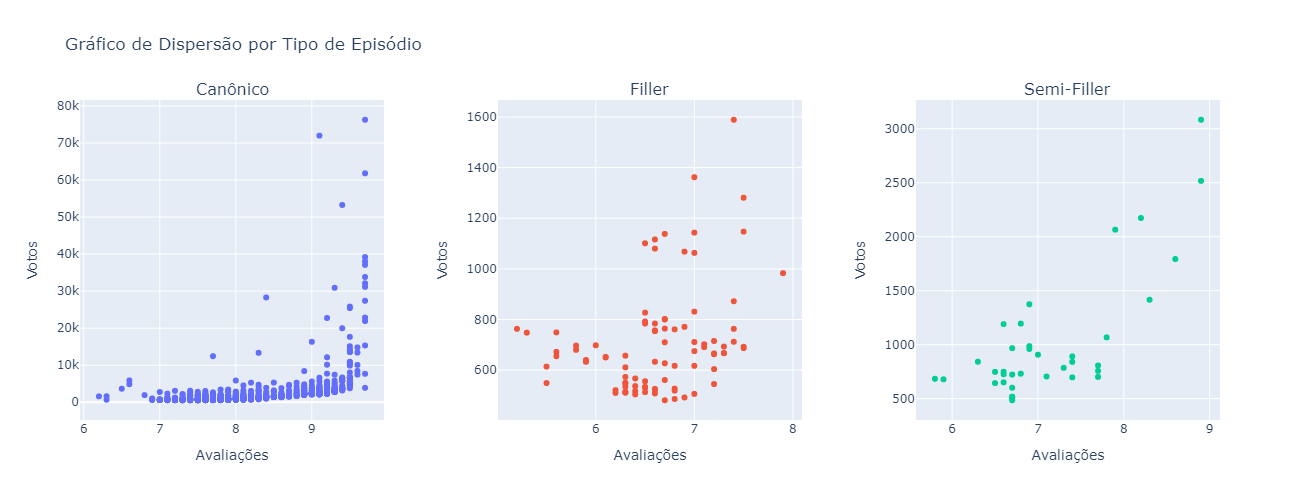

In [46]:
df_canônico = df[df['Tipo'].isin(['Canônico'])].reset_index(drop=True) # Dataframe apenas com episódios canônicos
df_filler = df[df['Tipo'].isin(['Filler'])].reset_index(drop=True)     # Dataframe apenas com episódios filler 
df_semi_filler = df[df['Tipo'].isin(['Semi-Filler'])].reset_index(drop=True) # Dataframe apenas com episódios semi-filler

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=['Canônico', 'Filler', 'Semi-Filler'], horizontal_spacing=0.1)

# Primeiro subplot
fig.add_trace(go.Scatter(x=df_canônico['Avaliação'], y=df_canônico['Votos'], mode='markers'), row=1, col=1)

# Segundo subplot
fig.add_trace(go.Scatter(x=df_filler['Avaliação'], y=df_filler['Votos'], mode='markers'), row=1, col=2)

# Terceiro subplot
fig.add_trace(go.Scatter(x=df_semi_filler['Avaliação'], y=df_semi_filler['Votos'], mode='markers'), row=1, col=3)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(xaxis1_title="Avaliações", yaxis1_title="Votos", xaxis2_title="Avaliações", yaxis2_title="Votos", 
                  xaxis3_title="Avaliações", yaxis3_title="Votos", height=500, width=1300, showlegend=False, title = 'Gráfico de Dispersão por Tipo de Episódio')
fig.show('png')

- Dentre os gráficos de dispersão dos três tipos, é difícil determinar a direção e a força das correlações, mas, observando visualmente, sugere-se haver uma correlação considerável para os episódios Canônicos e Semi-Filler, não necessariamente linear. Por conta disso, é necessário realizar um teste de correlação com o método adequado para determinar os valores exatos do coeficiente de correlação.

- Primeiramente, para definir o método de correlação a ser utilizado (Pearson ou Spearman), é necessário verificar se os votos e as avaliações de cada tipo apresentam distribuições normais. Para isso, utiliza-se um teste de normalidade. Para esse projeto, utilizei o teste de Shapiro-Wilk, que assume como hipótese nula que os dados seguem uma distribuição normal. Caso o p-valor seja ≤ α, rejeitamos a hipótese nula, indicando que os dados não seguem uma distribuição normal.

In [47]:
# Função para checar se a série passada por parâmetro apresenta distribuição normal (Teste de normalidade de Shapiro-Wilk)
def check_normality(distribution):
    p_value = shapiro(distribution).pvalue
    alfa = 0.05

    if p_value > alfa:
        return 'Apresenta distribuição normal'
    else:
        return 'Não apresenta distribuição normal'

In [48]:
dfs = [df_canônico, df_filler, df_semi_filler]

for df_ in dfs:
    votos = df_['Votos']
    avaliação = df_['Avaliação']
    tipo = df_['Tipo'].unique()[0]

    print(f'Distribuição de Votos do Tipo {tipo}: {check_normality(votos)}')
    print(f'Distribuição de Avaliações do Tipo {tipo}: {check_normality(avaliação)}')

Distribuição de Votos do Tipo Canônico: Não apresenta distribuição normal
Distribuição de Avaliações do Tipo Canônico: Não apresenta distribuição normal
Distribuição de Votos do Tipo Filler: Não apresenta distribuição normal
Distribuição de Avaliações do Tipo Filler: Apresenta distribuição normal
Distribuição de Votos do Tipo Semi-Filler: Não apresenta distribuição normal
Distribuição de Avaliações do Tipo Semi-Filler: Não apresenta distribuição normal


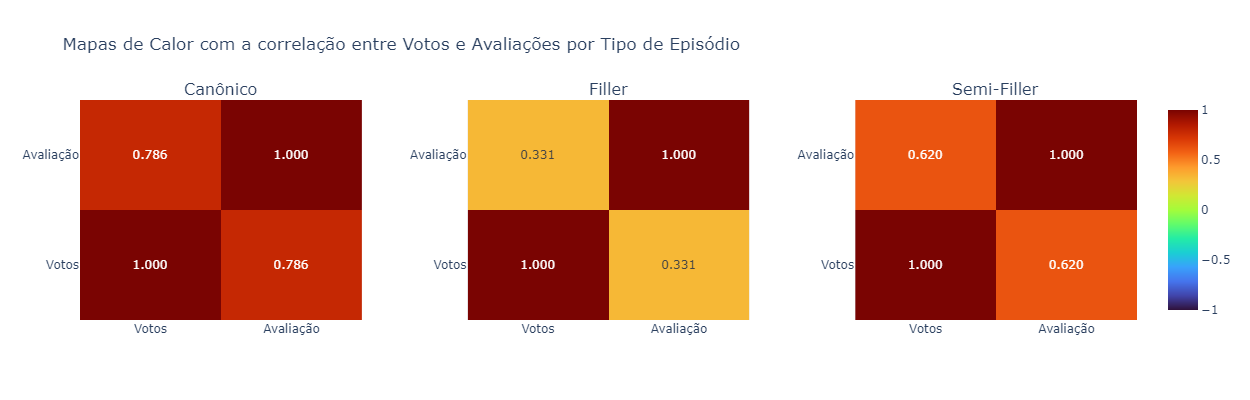

In [49]:
fig = sp.make_subplots(rows=1, cols=3, horizontal_spacing=0.1, subplot_titles=['Canônico', 'Filler', 'Semi-Filler'])

# Primeiro subplot
fig.add_trace(go.Heatmap(z = df_canônico[['Votos', 'Avaliação']].corr('spearman'), zmin=-1, zmax=1, 
                         x = ['Votos', 'Avaliação'], y = ['Votos', 'Avaliação'], texttemplate="%{z:.3f}", coloraxis="coloraxis"), row=1, col=1)

# Segundo subplot
fig.add_trace(go.Heatmap(z = df_filler[['Votos', 'Avaliação']].corr('spearman'), zmin=-1, zmax=1, 
                         x = ['Votos', 'Avaliação'], y = ['Votos', 'Avaliação'], texttemplate="%{z:.3f}", coloraxis="coloraxis"), row=1, col=2)

# Terceiro subplot
fig.add_trace(go.Heatmap(z = df_semi_filler[['Votos', 'Avaliação']].corr('spearman'), zmin=-1, zmax=1, 
                         x = ['Votos', 'Avaliação'], y = ['Votos', 'Avaliação'], texttemplate="%{z:.3f}", coloraxis="coloraxis"), row=1, col=3)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=400, width=1250, coloraxis={'colorscale': 'Turbo', 'cmin': -1, 'cmax': 1}, 
                  title= 'Mapas de Calor com a correlação entre Votos e Avaliações por Tipo de Episódio')
fig.show('png') 

- Nenhuma das duplas por tipo apresentaram distribuição normal, com exceção das avaliações do tipo filler. Porém, os votos não apresentam distribuição normal e a correlação de Pearson assume que ambas possuam distribuição normal. Por isso, utilizei o método de Spearman para analisar os coeficientes de correlação e determinar a força e direção.

- Nota-se que, para episódios canônicos, há uma forte correlação positiva entre a quantidade de votos e avaliações, com coeficiente equivalente à 78.6%. Junto ao gráfico de dispersão, vemos que é uma correlação não-linear. 
- Episódios Filler apresentam uma correlação positiva baixa, assim como sugerido pelo gráfico de dispersão.
- Episódios Semi-Filler apresentam uma correlação positiva moderada de ~62%.

#### A quantidade de votos e avaliações dos episódios relevantes para a narrativa principal lançados está melhorando ou piorando atualmente?

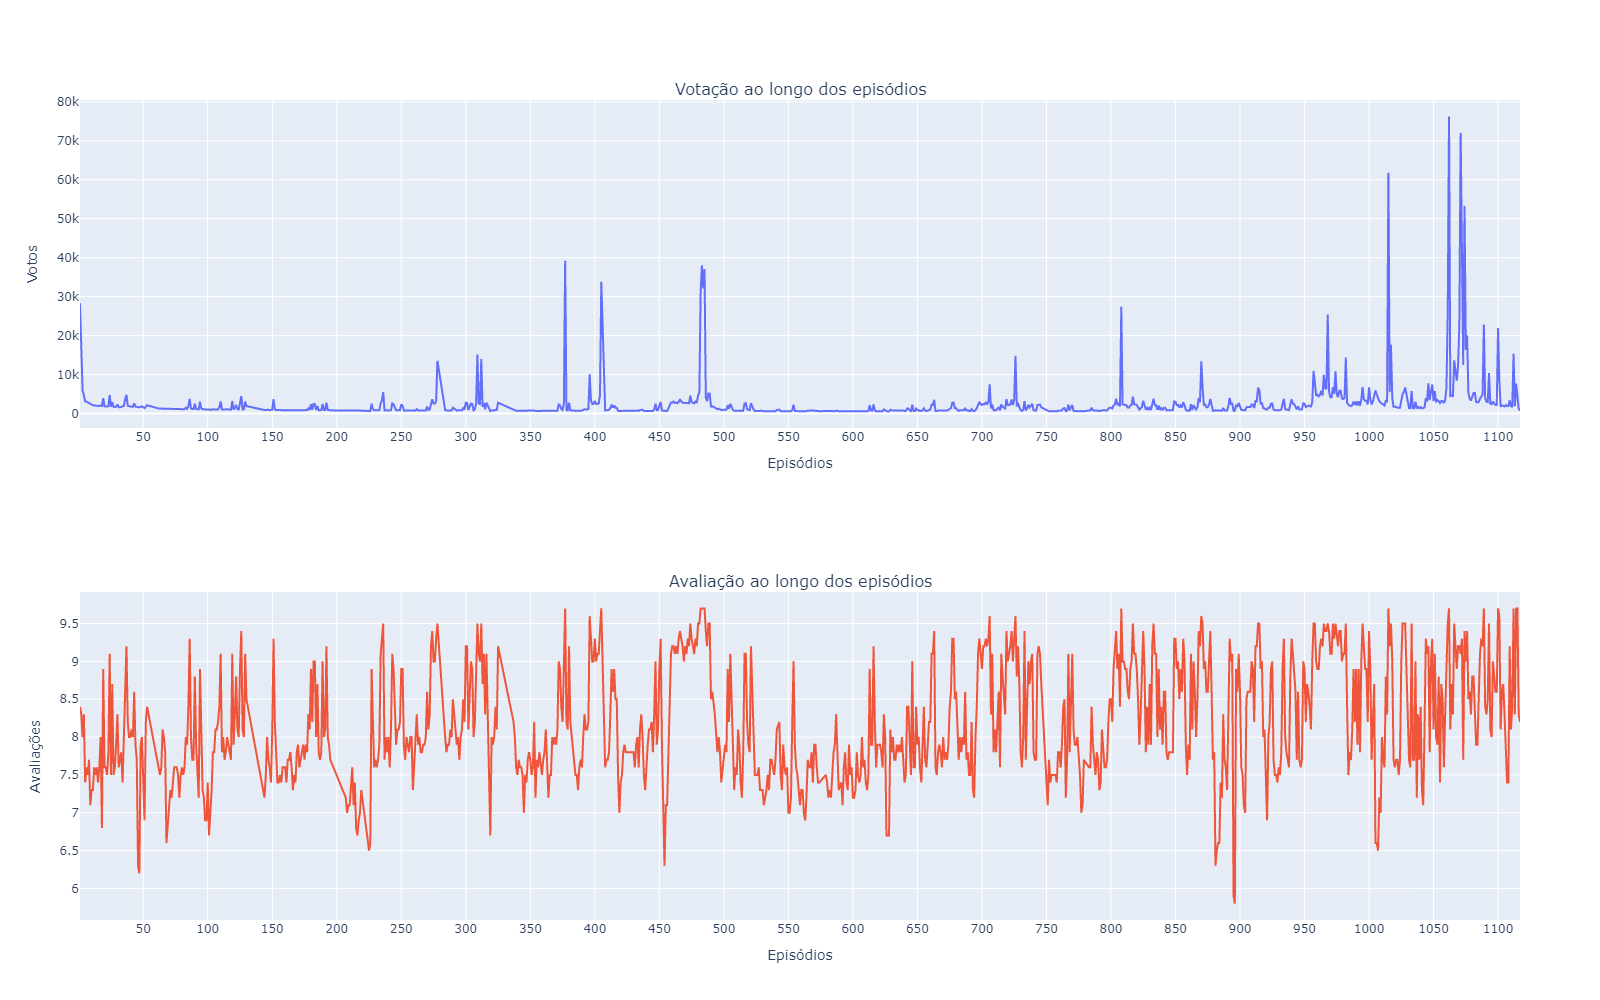

In [50]:
# Dataframe composto por episódios relevantes para a narrativa principal (Canônicos e Semi-filler)
df_canônico_semifiller = pd.concat([df_canônico, df_semi_filler]).sort_values('Episódio').reset_index(drop=True)

fig = sp.make_subplots(rows=2, cols=1, vertical_spacing=.2, 
                       subplot_titles=['Votação ao longo dos episódios', 'Avaliação ao longo dos episódios'])

# Primeiro subplot
fig.add_trace(go.Scatter(x=df_canônico_semifiller['Episódio'], y=df_canônico_semifiller['Votos']), row=1, col=1)
fig.update_xaxes(title_text="Episódios", dtick=50, row=1, col=1)
fig.update_yaxes(title_text="Votos", row=1, col=1)

# Segundo subplot
fig.add_trace(go.Scatter(x=df_canônico_semifiller['Episódio'], y=df_canônico_semifiller['Avaliação']), row=2, col=1)
fig.update_xaxes(title_text="Episódios",  dtick=50, row=2, col=1)
fig.update_yaxes(title_text="Avaliações", row=2, col=1)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=1000, width=1600, showlegend=False)
fig.show('png')

- Ao longo dos episódios parece haver uma sutil tendência de aumento na quantidade de votos a partir do episódio 950. Além disso, no começo houve uma quantidade alta de votos, provavelmente por ser o começo do anime e, em seguida, ocorreu uma queda que se manteve com alguns picos.
- Por volta do episódio 950, os picos começaram a se tornar mais frequentes e mais altos, tendo um aumento na presença de episódios em destaque mais vezes e com maiores votos até os dias atuais. Isso sugere que a qualidade dos episódios e/ou da história pode estar melhorando e resultando nesses picos, pois os telespectadores estão gostando e estão voltando a votar nos episódios que gostaram.
- As avaliações variaram bastante, mas nota-se uma queda entre os episódios 500 e 600. Porém, após a faixa de episódio 600, as avaliações apresentaram uma tendência de aumento perdurando até os episódios atuais.

#### O lançamento de episódios Filler está aumentando ou diminuindo atualmente?

In [60]:
# Criando coluna de distância entre os episódios no dataframe apenas com Filler 
df_filler['Distância entre Eps'] = df_filler['Episódio'].diff().fillna(0)

# Plot principal
fig = go.Figure(go.Scatter(x=df_filler['Episódio'], y=df_filler['Distância entre Eps'], mode='lines+markers'))
fig.update_xaxes(title_text="Episódios", dtick=100)
fig.update_yaxes(title_text="Tempo entre Fillers")

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=500, width=1000, showlegend=False)
fig.show('png')

- Pelo que pode-se notar, picos maiores no gráfico ao redor do 600º episódio indicam que a ocorrência de um ou mais filler seguidos após uma sequência de episódio Canônicos ou Semi-Fillers está se tornando maior.
- O maior pico teve um tempo de aproximadamente 160 episódios sem Filler, entre os episódios 590 e 750.

### Sobre os Arcos

#### Quantos arcos existem no anime? Qual a quantidade de episódios em cada um e quais são os maiores? 

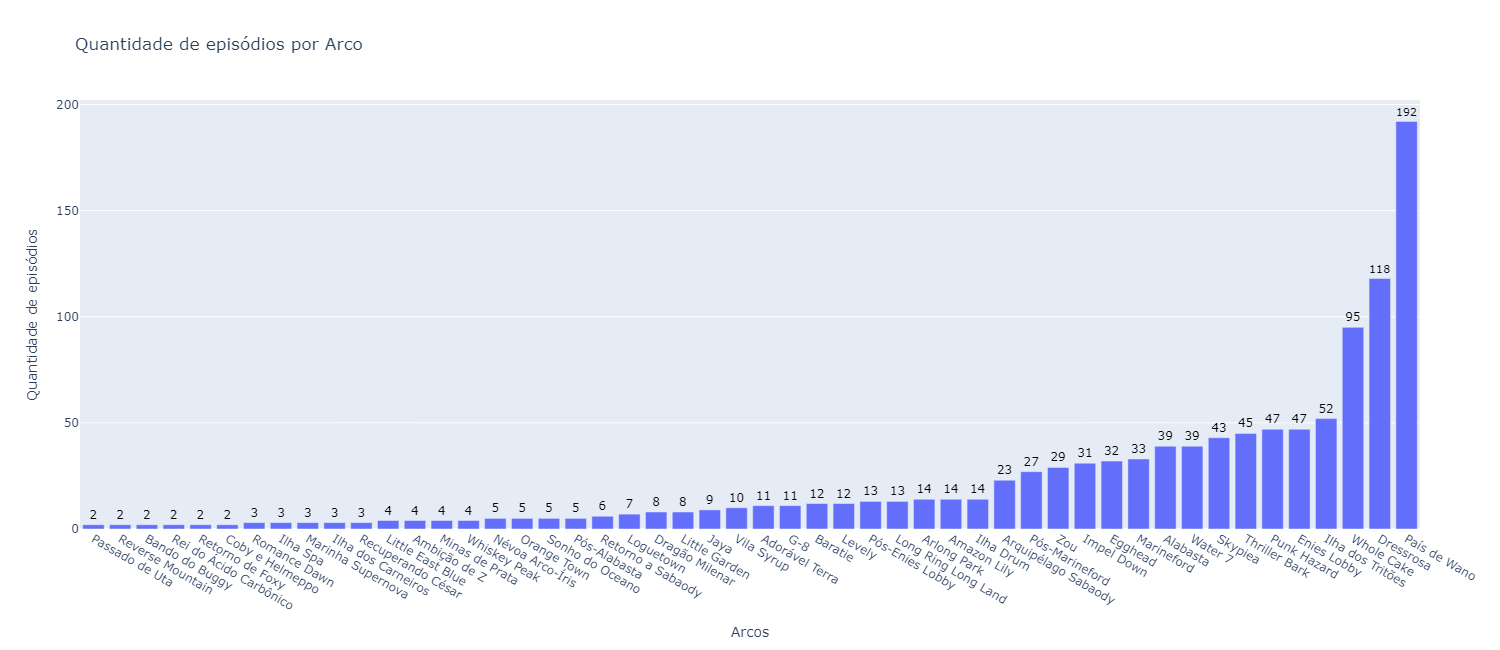

In [52]:
# Quantidade de episódios agrupados por arco, ordenado do menor para o maior
eps_por_arco = df['Arco'].value_counts().sort_values()

# Plot principal
fig = go.Figure(go.Bar(x=eps_por_arco.index, y=eps_por_arco.values, texttemplate="%{y:}", textangle=360, textposition='outside', textfont=dict(color='black')))
fig.update_xaxes(title_text="Arcos")
fig.update_yaxes(title_text="Quantidade de episódios")

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(title= 'Quantidade de episódios por Arco', height=650, width=1500, showlegend=False)
fig.show('png')

- No total, One Piece possui 50 arcos. Os maiores arcos são, principalmente: País de Wano (192 episódios), Dressrosa (118 episódios) e Whole Cake (95 episódios).

#### Qual o tipo ou quais os tipos de episódio presentes em cada arco?

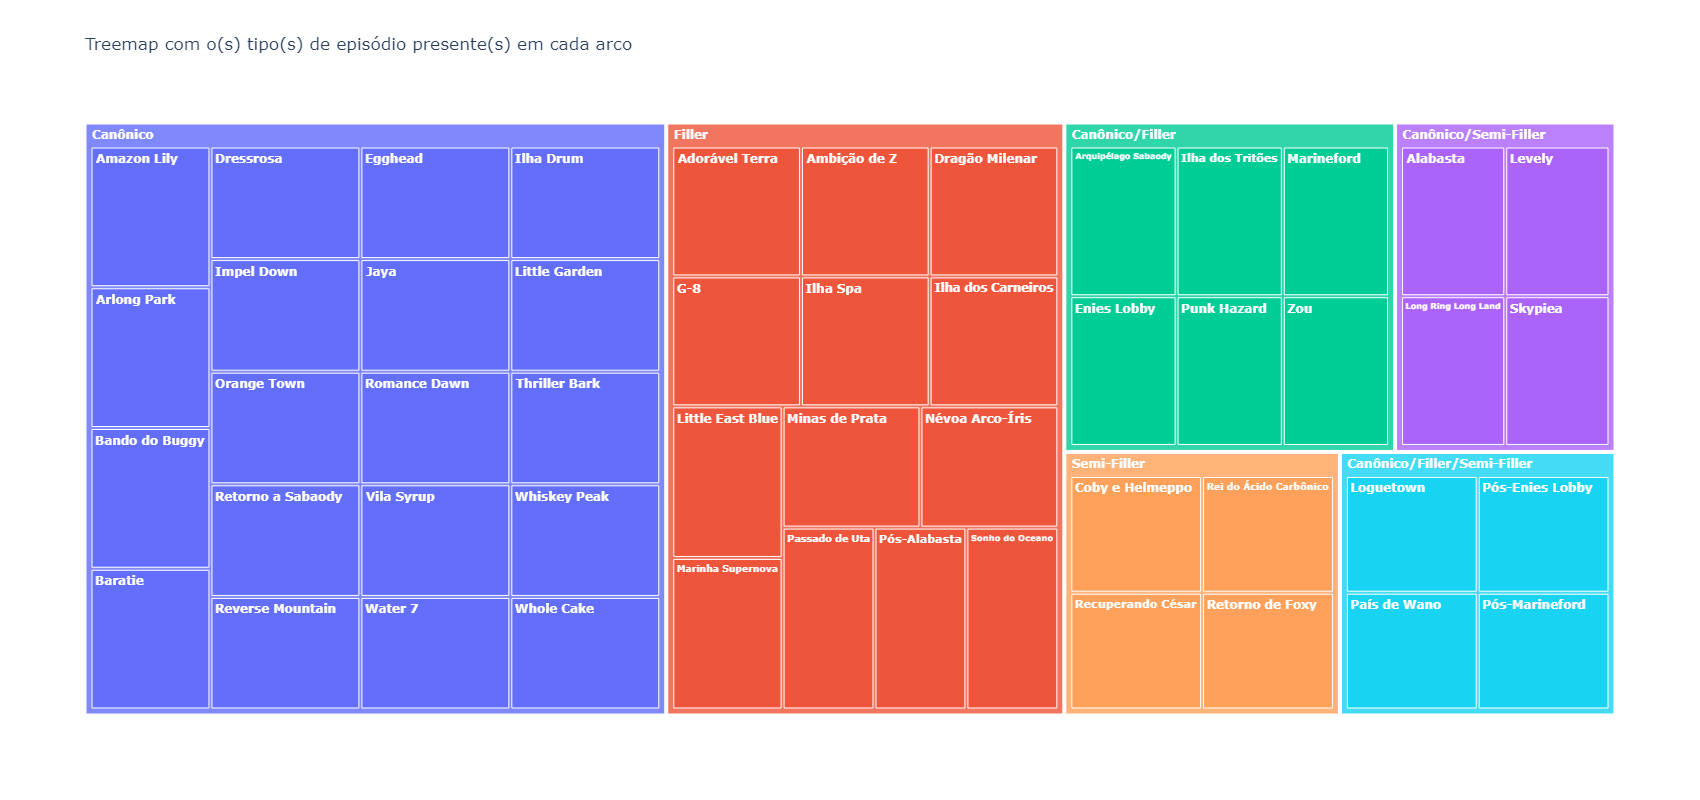

In [53]:
# Tipos de episódio presentes em cada arco
arcos_tipos = df.sort_values('Tipo').groupby('Arco')['Tipo'].unique().apply(lambda x: '/'.join(x))

# Todos os nomes presentes no treemap (tipos e arcos)
labels = arcos_tipos.unique().tolist() + arcos_tipos.index.tolist()

# Nomes-Pai no Treemap (tipos)
parents = ['' for i in range(len(arcos_tipos.unique()))] + arcos_tipos.tolist()

# Plot principal
fig = go.Figure(go.Treemap(labels=labels, parents=parents, textfont=dict(color='white', weight='bold')))

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(title='Treemap com o(s) tipo(s) de episódio presente(s) em cada arco', height=800, width=1700)
fig.show('png')

- Dentre os 50 arcos, 19 são completamente canônicos. Além disso, 14 arcos possuem episódios canônicos e fillers, semi-fillers ou ambos. Ou seja, 33 arcos fazem parte da narrativa principal da história, equivalente à 66% do total de arcos.
- Enquanto isso, 13 arcos são totalmente filler (26% do total de arcos) e 4 são totalmente Semi-Filler (8% do total de arcos). 
- Não há arcos compostos por Fillers e Semi-Fillers.

#### Quais são os arcos mais votados e os melhor avaliados? 

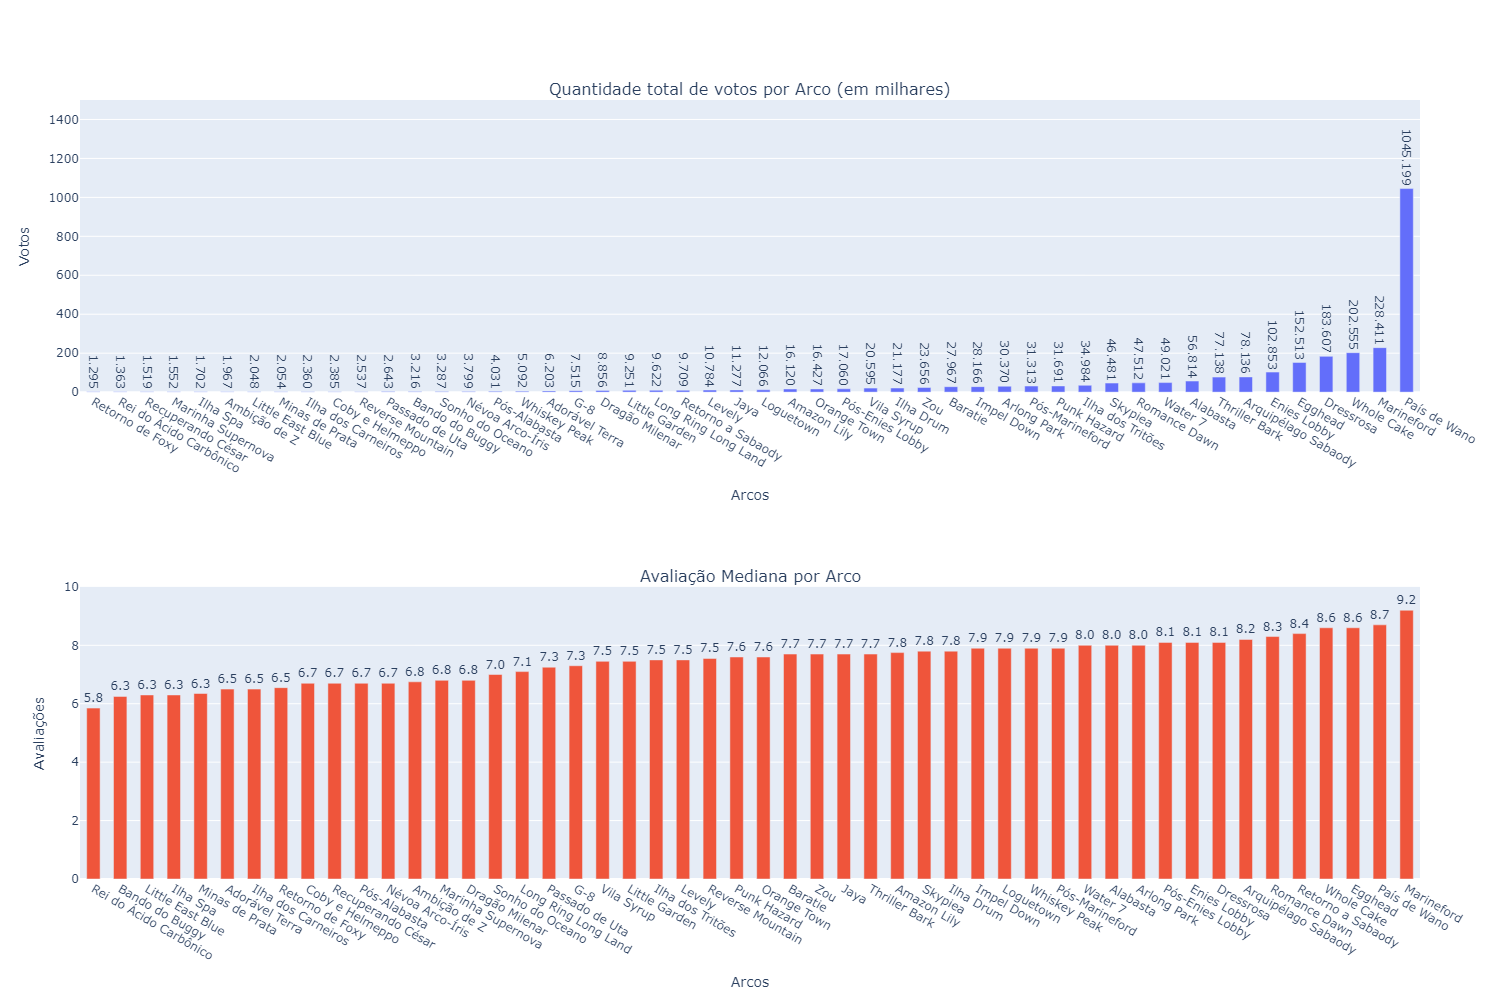

In [54]:
# Votação média agrupada por arco, ordenado do menor para o maior
arco_sum_votos = df.groupby('Arco')['Votos'].sum().sort_values()

# Avaliação média agrupada por arco, ordenado do menor para o maior
arco_median_avaliacao = df.groupby('Arco')['Avaliação'].median().sort_values()

fig = sp.make_subplots(rows=2, cols=1, subplot_titles=['Quantidade total de votos por Arco (em milhares)', 'Avaliação Mediana por Arco'], vertical_spacing=0.25)

# Primeiro subplot
fig.add_trace(go.Bar(x=arco_sum_votos.index, y=(arco_sum_votos.values)/1000, texttemplate="%{y:.3f}", textangle=90, textposition='outside'), row=1, col=1)
fig.update_xaxes(title_text="Arcos", row=1, col=1)
fig.update_yaxes(title_text="Votos", row=1, col=1)

# Segundo subplot
fig.add_trace(go.Bar(x=arco_median_avaliacao.index, y=arco_median_avaliacao.values, texttemplate="%{y:.1f}", textposition='outside'), row=2, col=1)
fig.update_xaxes(title_text="Arcos", row=2, col=1)
fig.update_yaxes(title_text="Avaliações", row=2, col=1)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(yaxis1_range=[0, 1500], yaxis2_range=[0, 10], height=1000, width=1500, showlegend=False, bargap=0.5, uniformtext=dict(minsize=10, mode='show'))
fig.show('png')

- O arco com a maior quantidade de votos é País de Wano com 1.045.199 votos. Depois dele, há Marineford com 228.411 votos e Whole Cake com 202.555 votos. Como o arco País de Wano possui 192 episódios, sugere-se que isso pode ter influenciado significativamente na quantidade de votos. Mas também vimos que esse arco apresenta alguns valores bem acima do normal, quando se trata de votos e avaliação. Por isso, é importante avaliar se há uma correlação entre a quantidade de episódios no arco e a quantidade de votos.
- Sobre a avaliação mediana de cada arco, Marineford foi o melhor com nota 9.2, seguido de País de Wano com 8.7 e Egghead com 8.6.
- Nota-se que, os arcos menos votados e pior avaliados são arcos fillers e semi-fillers (que já apresentam uma mediana baixa de episódios).

### O tamanho do arco tem correlação com a sua quantidade total de votos e a avaliação mediana?    

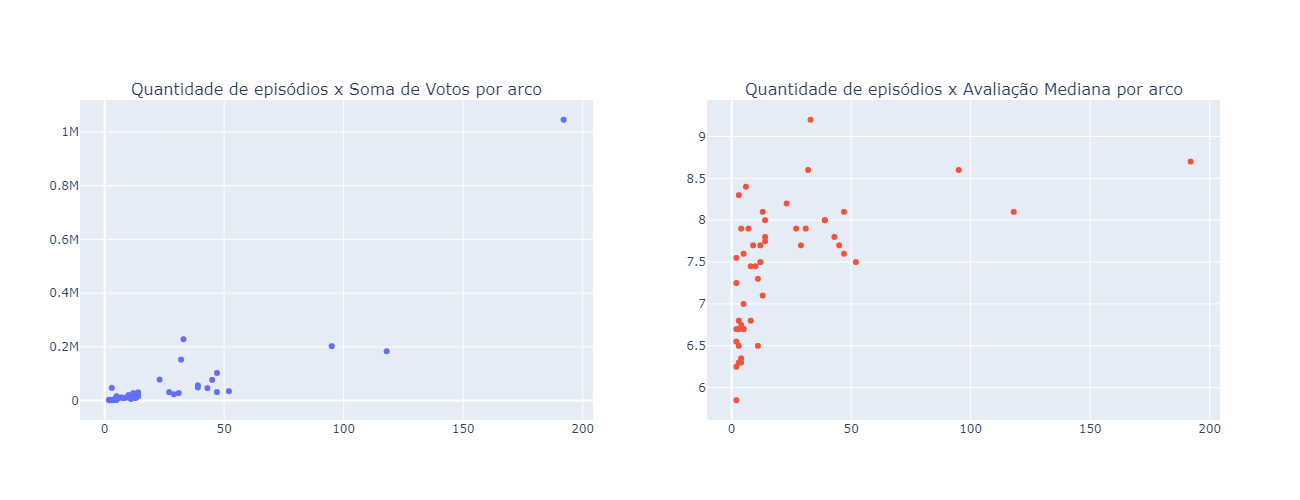

In [55]:
# Dataframe com quantidade de episódios, soma de votos e mediana de avaliações agrupado por arco
arcos_epsQtd_votosSum_avaliacaoMedian = eps_por_arco.reset_index().rename(columns={'count': 'Qtd de Episódios'})\
                                                          .merge(arco_sum_votos.reset_index(), how='left', on='Arco')\
                                                          .merge(arco_median_avaliacao.reset_index(), how='left', on='Arco')

fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Quantidade de episódios x Soma de Votos por arco', 'Quantidade de episódios x Avaliação Mediana por arco'])

# Primeiro subplot
fig.add_trace(go.Scatter(x=arcos_epsQtd_votosSum_avaliacaoMedian['Qtd de Episódios'], y=arcos_epsQtd_votosSum_avaliacaoMedian['Votos'], mode='markers'), row=1, col=1)

# Segundo subplot
fig.add_trace(go.Scatter(x=arcos_epsQtd_votosSum_avaliacaoMedian['Qtd de Episódios'], y=arcos_epsQtd_votosSum_avaliacaoMedian['Avaliação'], mode='markers'), row=1, col=2)

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=500, width=1300, showlegend=False)
fig.show('png')

- Aparentemente, a quantidade de episódios e soma de votos por arco parece haver uma correlação linear. Enquanto isso, não há uma correlação linear visivel da quantidade de episódios com a avaliação mediana, mas pode ser que haja uma correlação não-linear. 
- Será necessário realizar o teste de correlação Pearson ou Spearman para saber o coeficiente de correlação e determinar a força e direção, dependendo da correlação entre as duplas de variáveis.

In [56]:
votos = arcos_epsQtd_votosSum_avaliacaoMedian['Votos']
avaliação = arcos_epsQtd_votosSum_avaliacaoMedian['Avaliação']
qtd_eps = arcos_epsQtd_votosSum_avaliacaoMedian['Qtd de Episódios']

print(f'Distribuição da quantidade de episódios por arco: {check_normality(qtd_eps)}')
print(f'Distribuição da soma de votos por arco: {check_normality(votos)}')
print(f'Distribuição da avaliação mediana por arco: {check_normality(avaliação)}')

Distribuição da quantidade de episódios por arco: Não apresenta distribuição normal
Distribuição da soma de votos por arco: Não apresenta distribuição normal
Distribuição da avaliação mediana por arco: Apresenta distribuição normal


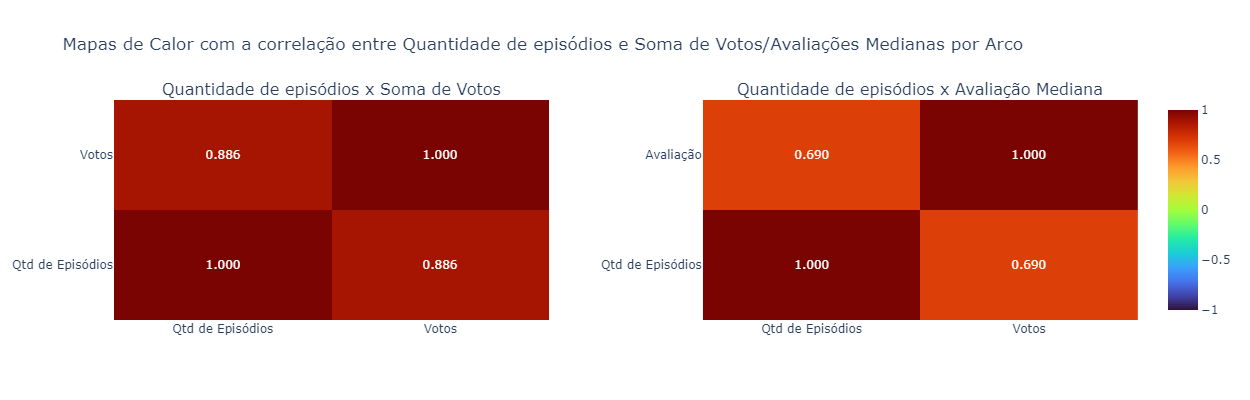

In [57]:
fig = sp.make_subplots(rows=1, cols=2, horizontal_spacing=0.15, 
                       subplot_titles=['Quantidade de episódios x Soma de Votos', 'Quantidade de episódios x Avaliação Mediana'])

# Primeiro subplot
fig.add_trace(go.Heatmap(z = arcos_epsQtd_votosSum_avaliacaoMedian[['Qtd de Episódios', 'Votos']].corr('spearman'), zmin=-1, zmax=1, 
                         x = ['Qtd de Episódios', 'Votos'], y = ['Qtd de Episódios', 'Votos'], texttemplate="%{z:.3f}", coloraxis="coloraxis"), row=1, col=1)

# Segundo subplot
fig.add_trace(go.Heatmap(z = arcos_epsQtd_votosSum_avaliacaoMedian[['Qtd de Episódios', 'Avaliação']].corr('spearman'), zmin=-1, zmax=1, 
                         x = ['Qtd de Episódios', 'Votos'], y = ['Qtd de Episódios', 'Avaliação'], texttemplate="%{z:.3f}", coloraxis="coloraxis"), row=1, col=2)


# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=400, width=1250, coloraxis={'colorscale': 'Turbo', 'cmin': -1, 'cmax': 1}, 
                  title= 'Mapas de Calor com a correlação entre Quantidade de episódios e Soma de Votos/Avaliações Medianas por Arco')
fig.show('png') 

- A partir do Mapa de Calor das correlações com método Spearman, vemos que há uma forte correlação positiva entre a quantidade de episódios e a soma total de votos por arco, com coeficiente equivalente à 88.6%. Isso sugere que o caso do arco de País de Wano ter muitos episódios e também muitos votos não é algo exclusivo.
- Já sobre a quantidade de episódios e a avaliação mediana por arco, também há uma forte correlação positiva, porém um pouco menor, com coeficiente equivalente à 69%. 

### Há uma correlação entre a quantidade total de votos e avaliação mediana de cada arco?  

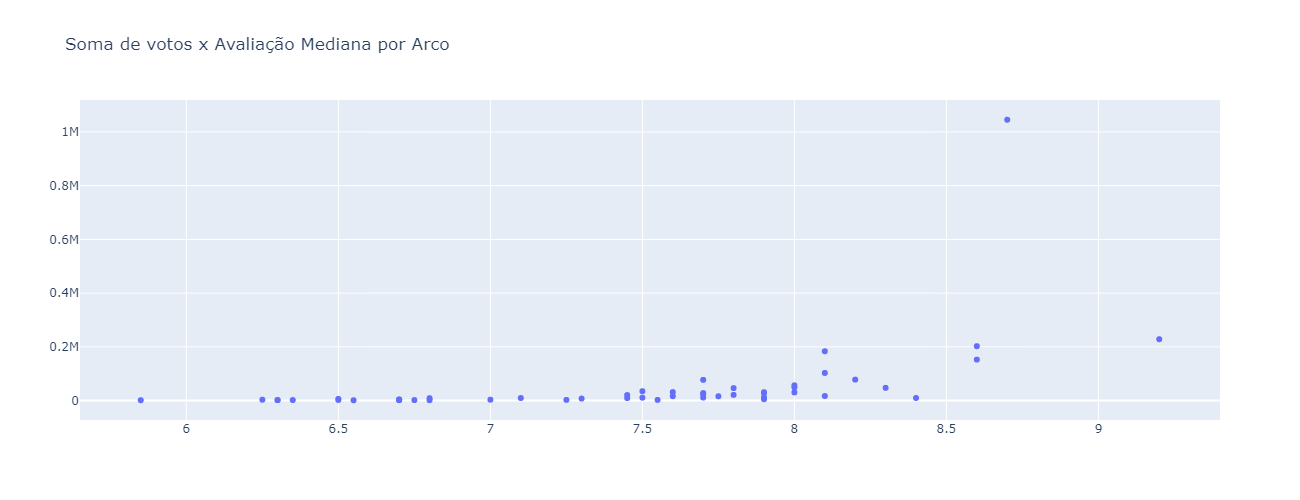

In [58]:
# Plot principal
fig = go.Figure(go.Scatter(x=arcos_epsQtd_votosSum_avaliacaoMedian['Avaliação'], y=arcos_epsQtd_votosSum_avaliacaoMedian['Votos'], mode='markers'))

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(title= 'Soma de votos x Avaliação Mediana por Arco', height=500, width=1300, showlegend=False)
fig.show('png')

- Aparentemente, não há uma correlação linear mas pode ser que haja uma correlação não-linear. 
- Vimos anteriormente que a premissa de ambas as variáveis apresentarem distribuição normal não é satisfeita, logo utilizamos o método de Spearman para obter as correlações. 

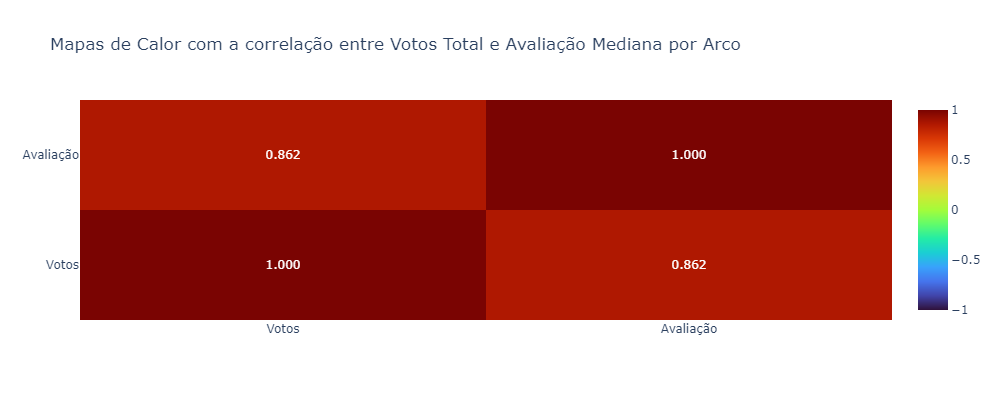

In [59]:
# Plot principal
fig = go.Figure(go.Heatmap(z = arcos_epsQtd_votosSum_avaliacaoMedian[['Votos', 'Avaliação']].corr('spearman'), zmin=-1, zmax=1, 
                         x = ['Votos', 'Avaliação'], y = ['Votos', 'Avaliação'], texttemplate="%{z:.3f}", coloraxis="coloraxis"))

# Atualizando layout com rótulos dos eixos e exibição do gráfico
fig.update_layout(height=400, width=1000, coloraxis={'colorscale': 'Turbo', 'cmin': -1, 'cmax': 1}, 
                  title= 'Mapas de Calor com a correlação entre Votos Total e Avaliação Mediana por Arco')
fig.show('png') 

- A partir do Mapa de Calor, vemos que há uma forte correlação entre a quantidade total de votos e a avaliação mediana por arco, equivalente à 86.2%.

#### Resumo dos achados

- Considerando tipos de episódio:
    - O anime possui 1117 episódios e uma esmagadora porcentagem dos episódios apresenta conteúdo relevante para a narrativa principal do anime (92% dos episódios). 
    - Episódios canônicos têm maiores votações e avaliações em comparação aos fillers e semi-fillers. Isso é esperado nos animes, pois episódios canônicos são compostos inteiramente pela narrativa principal e atraem mais os fãs.
    - Há uma enorme quantidade de outliers de votação de episódios canônicos, que se destacaram por conta da quantidade de telespectadores que votaram esporadicamente.
    - 14 episódios canônicos foram avaliados com a nota máxima, equivalente à nota 9.7. Todos os episódios são emblemáticos, pertencentes aos arcos de Thriller Bark, Arquipélago de Sabaody, Marineford, Whole Cake, País de Wano e Egghead.  
    - O episódio 1062 além de ter a avaliação máxima, também possui a quantidade de votos mais alta de todas. A quantidade de votos equivale à aproximadamente 62x a mediana dos episódios canônicos.
    - Vale notar que, Egghead é o último arco que ainda está em lançamento e já possui avaliação 9.7 cinco vezes, dando a entender que os fãs estão gostando.
    - O arco de Egghead, ainda em lançamento, já obteve avaliação 9.7 cinco vezes, sugerindo boa recepção dos fãs ao decorrer atual do anime.
    - Episódios Canônicos e Semi-Filler apresentam uma forte correlação positiva entre quantidade de votos e avaliações.
    - Os episódios relevantes pra história do anime apresentam uma tendência de aumento na quantidade de votos e avaliações, além de apresentar picos mais frequentes e altos nos valores nos últimos arcos. Isso sugere que a qualidade dos episódios e/ou da história pode estar melhorando e resultando nesses picos, pois os telespectadores estão gostando e estão votando positivamente nos episódios de destaque.
    - Enquanto isso, fillers sugerem estar ocorrendo com menor frequência, tendo maiores intervalos entre seus lançamentos.

- Considerando os arcos:
    - O anime possui 50 arco, onde os maiores são: País de Wano (192 episódios), Dressrosa (118 episódios) e Whole Cake (95 episódios). Dentre os 50, 33 (66% do total) apresentam conteúdo relevante pra narrativa princiapal, compostos por episódios canônicos, canônicos/semi-filler, canônicos/filler e canônicos/semi-filler/filler. Enquanto isso, há 13 arcos Filler (26% do total).
    - O arco com a maior quantidade de votos é País de Wano com 1.045.199 votos. Depois dele, há Marineford com 228.411 votos e Whole Cake com 202.555 votos. Já sobre a avaliação mediana de cada arco, Marineford foi o melhor com nota 9.2, seguido de País de Wano com 8.7 e Egghead com 8.6. Notou-se que, arcos menos votados e pior avaliados são arcos filler ou semi-filler.
    - Observou-se uma forte correlação entre a quantidade de episódios e a soma total de votos por arco, com coeficiente equivalente à 88.6%. Isso sugere que, o caso do arco de País de Wano ter muitos episódios e também muitos votos não é algo exclusivo. Sobre a quantidade de episódios e a avaliação mediana por arco, houve uma moderada correlação, com coeficiente igual a 69%. 
    - Por fim, foi visto uma forte correlação entre a quantidade total de votos e a avaliação mediana por arco, equivalente à 86.2%.